In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
import pickle

from sarthak_eda import resample

In [20]:
_,df=resample("D")

df.fillna(df.mean(),inplace=True)

df.set_index('date',inplace=True)
count_df=round((df.shape[0]*0.8)+3)
train_df=df['pm2_5'].iloc[:count_df]

#df_work['pm2_5'].iloc[:split_point]

print(train_df.ta())

#save model
final_model = SARIMAX(train_df, order=(3, 0, 0))
final_model_fit = final_model.fit()
with open('final_sarimax_model.pkl', 'wb') as file:
    pickle.dump(final_model_fit, file)

c:\Users\samoc\Desktop\DSCI590Streamlit\sarthak_eda.py:87: FutureWarning: The provided callable <function mean at 0x0000020EFFCCB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_nums=df_nums.resample('D').agg({'pm10':np.mean,'nh3':np.mean,
c:\Users\samoc\Desktop\DSCI590Streamlit\sarthak_eda.py:96: FutureWarning: The provided callable <function mean at 0x0000020EFFCCB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_nums=df_nums.groupby(by='date').agg({'pm10':np.mean,'nh3':np.mean,
c:\Users\samoc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\samoc

date
2022-08-18     45.106250
2022-08-19     41.465000
2022-08-20    181.294167
2022-08-21     79.108750
2022-08-22     68.063333
Name: pm2_5, dtype: float64


2022-08-23    120.394266
2022-08-24    153.002211
2022-08-25    166.281968
2022-08-26    173.832885
2022-08-27    152.645752
2022-08-28    165.284911
2022-08-29    189.859685
2022-08-30    194.397350
2022-08-31    214.198608
2022-09-01    238.711689
2022-09-02    241.805142
2022-09-03    217.168969
2022-09-04    215.561251
2022-09-05    225.213546
2022-09-06    230.208070
2022-09-07    226.775219
2022-09-08    194.266563
2022-09-09    198.627409
2022-09-10    217.081318
2022-09-11    216.491486
Freq: D, Name: predicted_mean, dtype: float64


TypeError: float() argument must be a string or a real number, not 'PredictionResultsWrapper'

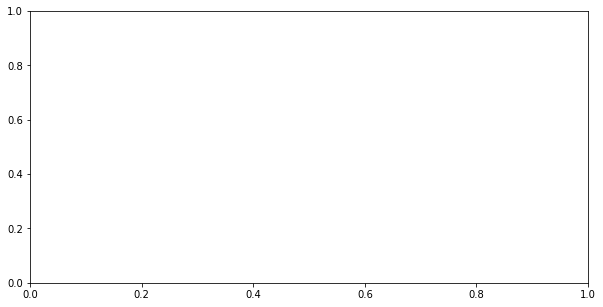

In [23]:
with open('final_sarimax_model.pkl','rb') as f:
    model=pickle.load(f,encoding='utf-8')

forecast = model.get_forecast(steps=20)

forecast_mean = forecast.predicted_mean
print(forecast_mean)
plt.figure(figsize=(10, 5))

plt.plot(forecast, label='Forecast', color='red')

plt.title('SARIMAX Forecast')
plt.legend()
plt.show()